# Classification Predictions on Teaching Assistant Evaluations

##### By: Kathy Tian  


## Table of Contents

[Introduction](#Introduction)

- [Exploratory Analysis](#Exploratory-Analysis)
- [Visualizations](#Visualizations)

[Logistic Regression](#Logistic-Regression)

[Random Forest Classifier](#Random-Forest-Classifier)

- [Hyperparameter Tuning](#Hyperparameter-Tuning)
- [RandomizedSearchCV](#RandomizedSearchCV)
- [StratifiedKFold](#StratifiedKFold)

[Support Vector Machine: Classification](#Support-Vector-Machine:-Classification)

- [GridSearchCV ](#GridSearchCV )

-----

Before proceeding with the _Introduction_ section of this Notebook, I set up some standard setup codes.

In [79]:
# Set up Notebook
% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

[[Back to TOC]](#Table-of-Contents)

### Introduction 



In this notebook, I will explore different classification algorithms and will apply them to "Teaching Assistant Evaluation" data, which I found from UCI's machine learning repository online. The TA dataset contains 151 instances and 6 attributes (including the class attribute). I will try to predict how students evaluate their teaching assistants (the outcome variable) based on a set of 5 feature values (if the TA is a native English speaker or not, which course it is, the size of the class, which TA it is and summer or regular course). I will see how these three factors influence what grades students' give to their TA's (from low, medium, to high).

In this notebook, I will first conduct exploratory analysis on the data to get a rough overview of what stories the data might tell. From there, I will decide which machine learning algorithms to use (in this case, since the label data is categorical, I decided on classification algorithms for my models). I will then train and fit the data to each of models and test their prediction accuracy rates. This is a good way to compare and contrast different machine learning algorithms. 



A break down of attribute information is as follows: 
  1. Whether of not the TA is a native English speaker (binary)
      1=English speaker, 2=non-English speaker
  2. Course instructor (categorical, 25 categories)
  3. Course (categorical, 26 categories)
  4. Summer or regular semester (binary) 1=Summer, 2=Regular
  5. Class size (numerical)
  6. Class attribute (categorical) 1=Low, 2=Medium, 3=High

-----

-----
[[Back to TOC]](#Table-of-Contents)

### Exploratory Analysis 

I will begin this notebook with some exploratory analysis of the data. I do this to give me a good idea of the data and understand its attributes. What I am looking to see are perhaps correlations between variables, if variables are categorical or continuous, and the relationship between how many variables we have and how many samples we have.

In the code cell below, I first upload the csv file contaning the dataset. I set the column names for all the variables. I then print a random sample set of 5 of the data points. 

We can see that english_speaker and semester are both binary variables. Course_instructor, course, and score are all categorical variables and class_size is a numerical variable. So far, we don't see any missing data, but to double check this, I will call the describe function to describe our dataset.

After calling the describe function, we can see that the dataset contains no null or NaN values - the count across all 6 of our columns is 151, indicating that we have a clean, uniform dataset that will require limited preprocessing. 


-----

In [80]:
# read csv and label columns
col_names = ['english_speaker', 'course_instructor', 'course', 'semester', 
            'class_size','score']
data = pd.read_csv('tae.data.csv', header=None, names=col_names)

# view random sample 
# can see that we are working with classification 
data.sample(5)

,english_speaker,course_instructor,course,semester,class_size,score
53,2,6,17,2,42,2
18,2,13,3,1,10,2
1,2,15,3,1,17,3
26,2,8,3,2,24,2
84,1,22,3,2,45,3


In [81]:
# describe data 
# can see we have no missing data
data.describe()

,english_speaker,course_instructor,course,semester,class_size,score
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


----
[[Back to TOC]](#Table-of-Contents)
### Visualizations

I first extract the 'score' column from the dataset and set it as the label (y) as a pandas series. I then extract the other variables as the feature (x) variables as a pandas dataframe. 

I then go on to create some barplots of the data points, with each of the feature variables running on the x-axis and the label data against the y-axis.The graphs, unfortunately, do not tell us much about the relationships between our data. We can see that English speakers get ranked slightly higher than non-native speakers, but the relationship does not appear particularily signifcant. We also see that summer courses are rated slightly higher than regular courses, and that classes that are middle sized appear to have a slight lower rating compared to small or large ones.

These relationships do make some sense; students are likely to perfer TA's when their English is more fluent. People may be more indifferent about mid-sized classes, but many may really like either very small or large classes. And perhaps people who chose to take summer courses simply enjoy school work more than other students. Or the sunshine helps!

In [82]:
# extrat feature and labels
label = data['score']
features = data.iloc[:,0:5]

Text(0,0.5,'Rating')

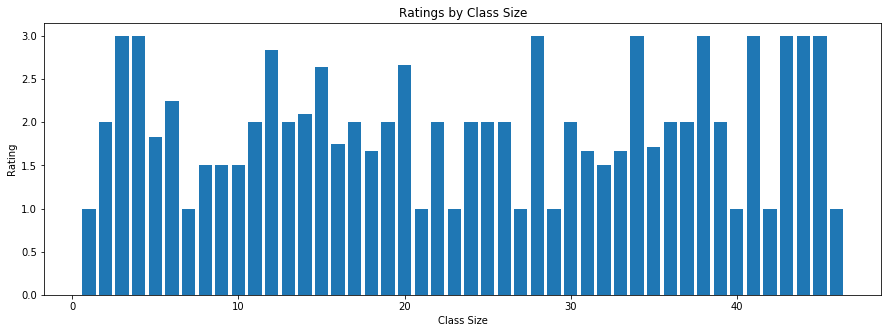

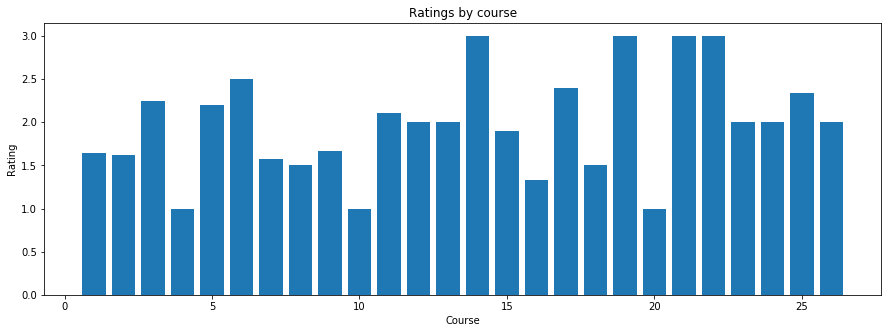

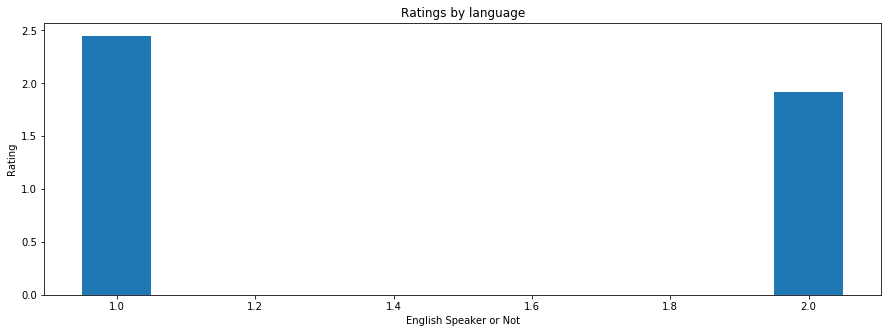

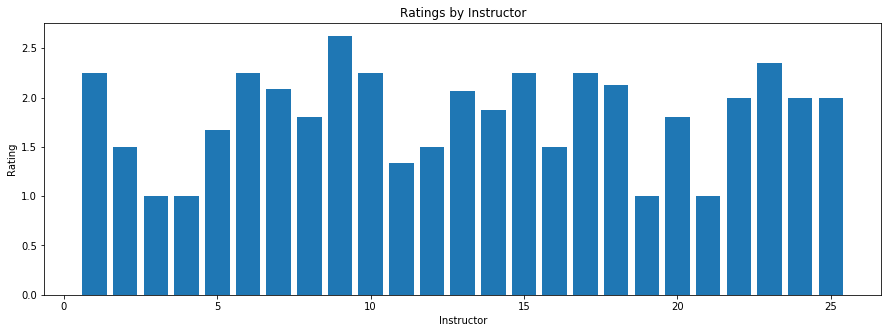

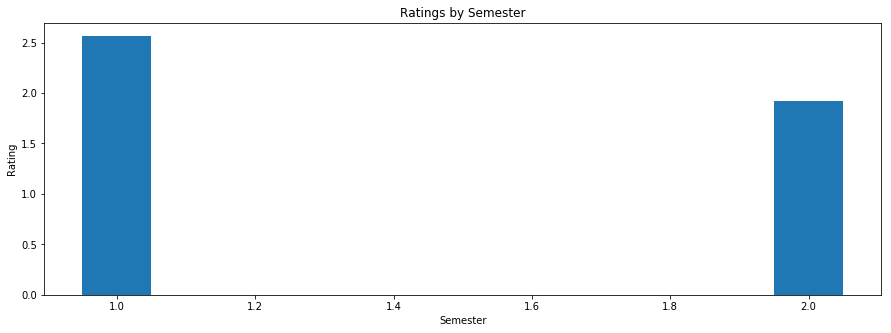

In [83]:
# Plot some relationships for intuition 
grouped_size = data.groupby("class_size").mean()
grouped_course = data.groupby("course").mean()

plt.figure(figsize = (15,5))
plt.bar(range(1,len(grouped_size) +1),grouped_size['score'])
plt.title('Ratings by Class Size')
plt.xlabel('Class Size')
plt.ylabel('Rating')

plt.figure(figsize = (15,5))
plt.bar(range(1,len(grouped_course) +1),grouped_course['score'])
plt.title('Ratings by course')
plt.xlabel('Course')
plt.ylabel('Rating')

plt.figure(figsize = (15,5))
eng_mean = data.groupby('english_speaker').mean()
plt.bar(range(1,len(eng_mean) +1), eng_mean['score'], width=0.1)
plt.title('Ratings by language')
plt.xlabel('English Speaker or Not')
plt.ylabel('Rating')

plt.figure(figsize = (15,5))
inst_mean = data.groupby('course_instructor').mean()
plt.bar(range(1,len(inst_mean) +1), inst_mean['score'])
plt.title('Ratings by Instructor')
plt.xlabel('Instructor')
plt.ylabel('Rating')

plt.figure(figsize = (15,5))
semester_mean = data.groupby('semester').mean()
plt.bar(range(1,len(semester_mean) +1), semester_mean['score'], width= 0.1 )
plt.title('Ratings by Semester')
plt.xlabel('Semester')
plt.ylabel('Rating')

[[Back to TOC]](#Table-of-Contents)

### Logistic Regression 
I will first train and fit the data using a logistic regression model. A logistic regression model would be suitable for this data since the label data data (or the dependent/outcome variable) in this instance is categorical, suggesting that we are facing a classification problem. However, logistic regressions are best for bianary classifications problems (e.g., 0,1), so I should expect that this model would perfrom poorly on my data set, which contains three classes. 

Unlike a linear regresion, where the output value is suitable for continious variables, the logistic regression works best for classification problems. It calculates the probability that the incoming data point belongs either above or below the threshold point of the sigmoid curve (the threshold is usally set at 0.5 for a function scaled from 0 to 1). If it predicts it to be below 0.5, the model will predict our new data point as belonging to class 0, if above 0.5, it will predict 1 a long our sigmoid. Interestingly, even though it is a classification algorithm, we're still working with probabilities - just the probability that our particular new data point belongs to a certain class. 

As mentioned, the logistic regression is best used for binary classification (e.g., spam, not spam) and it does not perform particularily well with small datasets, so I expect this model to perform poorly as a predictor. I will use this logistic regresison model for comparison purposes.

----


First, split the data on 80/20 percent split, where we save 20% of our data for testing. Next, fit the logistic regression model and predict using the trained model.

In [84]:
# split data with 20 percent reserved for testing
frac = .20
x_train, x_test, y_train, y_test = \
    train_test_split(features, label, test_size=frac, random_state=0)

In [85]:
from sklearn.linear_model import LogisticRegression

#logistic regression model
lr_model = LogisticRegression() 

# Fit a new model and predict on test data
lr_model = lr_model.fit(x_train, y_train)
lr_predicted = lr_model.predict(x_test)

I define a function called 'confusion' which will help me create a beautiful visualization (using a heatmap) to test our model's accuracy; how many TP, TN, FP, and FN the model predicts will be inuitive to see. 

In [86]:
# Three classes in "score"
labels = ['Low (1)', 'Medium (2)', 'High (3)']

# Function to plot confusion matrix
def confusion(test, predict, names, bins=3, title='Confusion Matrix'):

    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int), index=names, columns=names )
    
    hm = sns.heatmap(pd_pts, annot=True, fmt="d")    
    hm.axes.set_title(title, fontsize=20)
    hm.axes.set_xlabel('Actual', fontsize=18)
    hm.axes.set_ylabel('Predicted', fontsize=18)

    return None

In printing the accuracy score of the logistic regression model, we only get a score of less than 50%! This means that we would likely be better off guessing the position of each of new data point rather than using the model's prediction. This low score is expected, however, as the logsitic regression is not ideal for handling non-binary label data and small datasets. 

In [94]:
# Generate and display different evaluation metrics
score = 100.0 * accuracy_score(y_test, lr_predicted)
print(f'Logistic Regression [TA Evaluation Data] Score = {score:4.1f}%\n')

Logistic Regression [TA Evaluation Data] Score = 45.2%



The logistic regression did not do too well. In fact, it seemed to do worse than random chance. 

- Percision: tp / (tp + fp) [ability of classifier not to label as positive a sample that is negative]
- Recall: tp / (tp + fn) [ability to find all the positive samples]

    1. For class 1 (Low Ratings), the model predicted 6 correctly and 6 wrong, yielding a percision score of .50. 
    2. For class 2 (Medium Ratings), the model perdicted 2 correctly and 3 incorrectly, yielding a percision score of.40. 
    3. For class 3 (High Ratings), the model perdicted 6 correctly, and 8 incorrectly, yielding a percision score of .43. 




In [93]:
print(classification_report(y_test, lr_predicted))

             precision    recall  f1-score   support

          1       0.50      0.86      0.63         7
          2       0.40      0.17      0.24        12
          3       0.43      0.50      0.46        12

avg / total       0.43      0.45      0.41        31



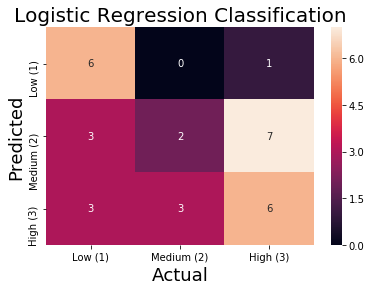

In [95]:
confusion(y_test, lr_predicted, labels, 3, 'Logistic Regression Classification')

----
[[Back to TOC]](#Table-of-Contents)
### Random Forest Classifier 

Let's see if the Random Forest Classifier, which uses bagging (boot strap aggregation), where random samples will be used to create several 'weak learning' decision trees, will do better. These multiple weak learners (decision trees that only see subsets of the data) will be combined to create a powerful model by averaging the predictions of the weak learners (or voting). 

I expect this model to perform much better than the logistic regression as the Random Forest is an ensemble predictor that can be very powerful given that a) it creates multiple decision trees, b) each decision tree only sees part of the data, c) the results are averaged (voted), which results in powerful predictions. Finally, The fact that it sub-sets the data also helps with avoiding over-fitting! 

Note: We can even add some more randomness with extra trees


----
What an improvement! The Random Forest Classifier gives us a much better prediction accuracy than the logistic regression. While the logistic regression was under 50% in accuracy, we reach nearly 70% accuracy with the Random Forest!

In [98]:
# perfrom classification with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
# Fit estimator to scaled training data
rfc = rfc.fit(x_train, y_train)

# Compute and display accuracy score
score = 100.0 * rfc.score(x_test, y_test)
print(f"Random Forest prediction accuracy = {score:5.2f}%")

Random Forest prediction accuracy = 67.74%


Out of curiosity, I printed out the features that were most important the prediction decision making process. Class size is overwhelmingly important, at 38.54%. Suprsingly, it seems as the being a native English speaker or not does not influence the model too much, at only 7.07%. It makes sense that the course and course instructor would be pretty important, some classes are just plain ol' boring!

In [99]:
# Display feature importances 
for name, val in zip(col_names, rfc.feature_importances_):
    print(f'{name} importance = {100.0*val:5.2f}%')

english_speaker importance =  7.07%
course_instructor importance = 27.17%
course importance = 21.16%
semester importance =  6.05%
class_size importance = 38.54%


The random forest classifier did quite well! It seems to be good predictor for our data, and we scored 67.74% before any hyperparameter tuning. 

- Percision: tp / (tp + fp) [ability of classifier not to label as positive a sample that is negative]
- Recall: tp / (tp + fn) [ability to find all the positive samples]

    1. For class 1 (Low Ratings), the model predicted 7 correctly and 5 wrong, yielding a percision score of .58. 
    2. For class 2 (Medium Ratings), the model perdicted 6 correctly and 2 incorrectly, yielding a percision score of.75. 
    3. For class 3 (High Ratings), the model perdicted 8 correctly, and 3 incorrectly, yielding a percision score of .73. 


In [11]:
# Predict on test data and report scores
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred, \
                            target_names = labels))

             precision    recall  f1-score   support

    Low (1)       0.58      1.00      0.74         7
 Medium (2)       0.75      0.50      0.60        12
   High (3)       0.73      0.67      0.70        12

avg / total       0.70      0.68      0.67        31



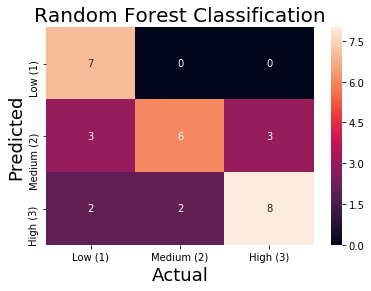

In [101]:
confusion(y_test, y_pred, labels, 3, 'Random Forest Classification')

[[Back to TOC]](#Table-of-Contents)

### Hyperparameter Tuning

Even though our model did relatively well, I want to try and improve the model accuracy through some hyperparameter tuning. I used the default settings in the model initially, so perhaps the model can be tuned to generate more accurate predictions. This is fun! 

First, I print the current parameters to see what the model used when fitting the data; they are all default, so our model is not particularily optimized to the data. 

In [102]:
#examine current hyperparamters 
from pprint import pprint
print('Paramters  in use: \n')
pprint(rfc.get_params())

Paramters  in use: 

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


[[Back to TOC]](#Table-of-Contents)
### RandomizedSearchCV
Maybe I would get a better score by using different paramters? Who knows? Let's try! There would be too many combanations for me to work through myself manually, so I'm going to call on my jolly good friend, RandomizedSearchCV, to help me iterate through random different combinations of the hyperparameters that would yield the best result. First, I'll make a parameter grid and then will fit this pram grid to my random search so I can see what the best params are.

### StratifiedKFold 
To help our RandomizedSearchCV get even higher accuracy, we set cross-validation generator (CV) to a StratifiedKFold, which is a cross-validation object that returns stratified folds. 

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=23)

random_params = {'n_estimators': [10, 70, 100, 300],
                'bootstrap': [True, False],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 2, 3, 4],
                'min_samples_split': [2, 5,6],
                'class_weight':['balanced', None]}

rfc_rand =RandomizedSearchCV(estimator=rfc, 
                             param_distributions=random_params,
                            random_state=0, 
                            cv=skf)

In [104]:
# fit training data to the randomized search CV
rfc_rand.fit(x_train, y_train)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=False),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [10, 70, 100, 300], 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 3, 4], 'min_samples_split': [2, 5, 6], 'class_weight': ['balanced', None]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [105]:
# check out our best params!
rfc_rand.best_params_

{'bootstrap': False,
 'class_weight': 'balanced',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

### Let's fit with our new params

The model accuracy fit with the new hyperparmeters increases to 71.0% accuracy, an improvement using the params returned from the RandomizedGridSearchCV! Time to do a little dance and celebrate!

In [113]:
rfc_new_params = RandomForestClassifier(bootstrap=False, 
                                        max_features='sqrt',
                                        min_samples_leaf=1,
                                        min_samples_split=6,
                                        n_estimators=100,
                                        class_weight='balanced',
                                        random_state=0)

rfc_new_params.fit(x_train, y_train)

score = 100.0 * rfc_new_params.score(x_test, y_test)
print(f"Random Forest prediction accuracy = {score:4.1f}%")
                                        

Random Forest prediction accuracy = 71.0%


----
Let's compare our RFC that used default params against our params returned by the search.

*RFC using default Params:*
   1. For class 1 (Low Ratings), the model predicted 7 correctly and 6 wrong, yielding a percision score of .58
   2. For class 2 (Medium Ratings), the model perdicted 6 correctly and 2 incorrectly, yielding a percision score of.75
   3. For class 3 (High Ratings), the model perdicted 8 correctly, and 3 incorrectly, yielding a percision score of .73 
   
   
*RFC using New Params:*
   1. For class 1 (Low Ratings), the model predicted 7 correctly and 4 wrong, yielding a percision score of .64. 
   2. For class 2 (Medium Ratings), the model perdicted 6 correctly and 3 incorrectly, yielding a percision score of.67 
   3. For class 3 (High Ratings), the model perdicted 9 correctly, and 2 incorrectly, yielding a percision score of .82

In [111]:
print(classification_report(y_test, rfc_new_predict))

             precision    recall  f1-score   support

          1       0.64      1.00      0.78         7
          2       0.67      0.50      0.57        12
          3       0.82      0.75      0.78        12

avg / total       0.72      0.71      0.70        31



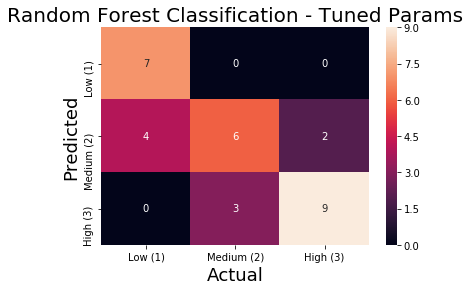

In [114]:
confusion(y_test, rfc_new_predict, labels, 3, 
          'Random Forest Classification - Tuned Params')

[[Back to TOC]](#Table-of-Contents)
### Support Vector Machine: Classification

The Suport Vector Machine Classifier (SVM) is a supervised machine learning algorithm to classify or predict data by categorizing data (allocating data to separate feature spaces). Unfortunately, like the logistic regression, default SVM works best with binary outcome classifications (although it can be manipulated for multiclass classifications). However, SVM is a good algorithm to handle smaller data samples. This is because not all the data points are used; only the support vectors are used in seperating the hyperplanes in feature space. The best choice hyperplane is the one that leaves the maximum margin from both classes, using the support vector.

As such, I suspect that this model will perform signifcantly better than the logistic regression in classifying the data using default parameters. It might not do as well as RFC as the RFC was an ensemble algorithm. However, because the SVM does not use all data points, it may be less prone to overfitting. 

---
Indeed, we see that using the default params for SVC gives a much better accuracy score than the logistic regression (45%), but it does not do as well as the RFC (67%). However, the SVC gives us a pretty good score (58%). 

In [117]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Using default params
svc = SVC()
svc.fit(x_train, y_train)

score = 100.0 * svc.score(x_test, y_test)
print(f"SVC prediction accuracy = {score:5.2f}%")

SVC prediction accuracy = 58.06%


[[Back to TOC]](#Table-of-Contents)
### GridSearchCV 
Let's see if tuning the hyperparameters will increase our accuracy score! Here, I use a GridSearchCV which will iterate through all the hyperparmeters I give it, in this case, just the "C" and "Kernel" params. Once again, I use a stratifiedKFold for the cross-validation parameter (CV). We fit the grid search and find the best params.


In [119]:
#use stratifiedkfolds for cross validation
skf = StratifiedKFold(n_splits=5, random_state=23)

# search through these params to increase score
svc_params = {'C': [1, 10, 100], 'kernel':['rbf', 'linear']}

#grid search CV to try all the combinations with skf
svc_gridsearch = GridSearchCV(estimator=svc, 
                             param_grid=svc_params,
                             cv=skf)

# fit training data to the grid search CV
svc_gridsearch.fit(x_train, y_train)

svc_gridsearch.best_params_

{'C': 100, 'kernel': 'rbf'}

### Fit with new params

Awesome! Fitting with the params returned by the grid search CV, the model's prediction accuracy increases nearly 4 percentage points! SVM is a good algorithm because it works well with small data sets (the support vectors are used to make classifications in hyperplanes, so not a huge amount of data is needed). However, it appears the RFC still scores better overall.

In [120]:
svc_new = SVC(C=100, kernel='rbf')
svc_new.fit(x_train, y_train)

score = 100.0 * svc_new.score(x_test, y_test)
print(f"SVC_new prediction accuracy = {score:5.2f}%")

SVC_new prediction accuracy = 61.29%


[[Back to TOC]](#Table-of-Contents)
### Thank you for this opportunity! 

Concluding notes: Try working with KNN over the SVM or logistic regression as the the KNN can work well with classification of data beyond binary classifications whereby new data points are voted on based on its K nearest neighbors. 

 © Kathy Tian